In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from itertools import cycle, islice
%matplotlib inline
import os

In [22]:
#Reading the dataset

In [23]:
os.getcwd
os.chdir("C:\\Users\\Home\Desktop\\DataTrained")

In [24]:
wine_df=pd.read_csv('winedataset.csv', sep=',',header=0)

In [25]:
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

In [26]:
wine_df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [27]:
#EDA

In [28]:
rows, cols = wine_df.shape
print( rows,"rows", cols,"columns")

178 rows 14 columns


In [29]:
wine_df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [30]:
#Finding NULL values

In [31]:
wine_df.isnull().any()

Class                   False
Alcohol                 False
Malic acid              False
Ash                     False
Alcalinity of ash       False
Magnesium               False
Total phenols           False
Flavanoids              False
Nonflavanoid phenols    False
Proanthocyanins         False
Color intensity         False
Hue                     False
diluted wines           False
Proline                 False
dtype: bool

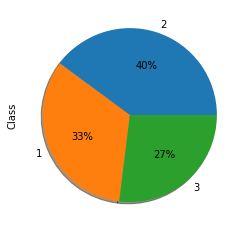

In [32]:
#To check samples for each class variable
sample_counts = wine_df['Class'].value_counts()
explode = (0, 0.1, 0)
sample_counts.plot(kind='pie',autopct='%.0f%%', shadow=True, figsize=(4,4), radius=1.0)

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


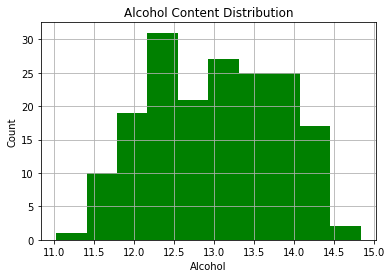

In [33]:
#TO check the distributions for variables
#Alcohol
hist_quality = wine_df['Alcohol']
plt.hist(hist_quality, 10, normed=False, facecolor='green')
plt.xlabel('Alcohol')
plt.ylabel('Count')
plt.title('Alcohol Content Distribution')
plt.grid(True)
plt.show()

C:\Users\Home\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


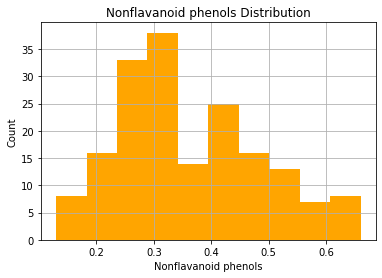

In [34]:
#Phenols distribution
hist_fixed = wine_df['Nonflavanoid phenols']
plt.hist(hist_fixed, 10, normed=False, facecolor='orange')
plt.xlabel('Nonflavanoid phenols')
plt.ylabel('Count')
plt.title('Nonflavanoid phenols Distribution')
plt.grid(True)
plt.show()

In [35]:
#Classification will be done using Decision Tree algorithm
classification_data = wine_df.copy()
label_mapping = {1:'Class-1', 2:'Class-2', 3:'Class-3'}
classification_data['Class_Label'] = classification_data['Class'].map(label_mapping)
classification_data.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline,Class_Label
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,Class-1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,Class-1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,Class-1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,Class-1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,Class-1


In [61]:
# Target is stored in Y
Y = classification_data[['Class_Label']].copy()
Y.head()

,Class_Label
0,Class-1
1,Class-1
2,Class-1
3,Class-1
4,Class-1


In [64]:
# Training features are stored in X
features = ['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium','Total phenols', 
            'Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','diluted wines','Proline']


In [65]:
features

['Alcohol',
 'Malic acid',
 'Ash',
 'Alcalinity of ash',
 'Magnesium',
 'Total phenols',
 'Flavanoids',
 'Nonflavanoid phenols',
 'Proanthocyanins',
 'Color intensity',
 'Hue',
 'diluted wines',
 'Proline']

In [70]:
X=classification_data.drop(['Class','Class_Label'],axis=1).copy()
X

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [74]:
# Split data into test and training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4, random_state = 42)

In [75]:
# Train decision tree
quality_classifier = DecisionTreeClassifier(max_leaf_nodes = 15, random_state = 42)
quality_classifier.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=15,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

In [76]:
predictions = quality_classifier.predict(X_test)
predictions[:10]

array(['Class-1', 'Class-1', 'Class-3', 'Class-1', 'Class-2', 'Class-1',
       'Class-2', 'Class-3', 'Class-2', 'Class-3'], dtype=object)

In [77]:
percentages = Y_test['Class_Label'].value_counts(normalize=True)
percentages

Class-2    0.375000
Class-1    0.361111
Class-3    0.263889
Name: Class_Label, dtype: float64

In [78]:
#Accuracy
accuracy_score(y_true = Y_test, y_pred = predictions) #Accuracy is 94%

0.9444444444444444